In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.shape

(200, 4)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### simple linear reg.

In [6]:
X = df[["TV"]]
y = df[["sales"]]

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2)   

In [9]:
reg_model = LinearRegression() 

In [10]:
reg_model.fit(X_train,y_train)

LinearRegression()

## y_pred = b+w*TV

In [11]:
reg_model.intercept_

array([7.22661581])

In [13]:
reg_model.intercept_[0]              # bias , intercept,sabit aynı anlamda

7.226615809756848

In [14]:
reg_model.coef_

array([[0.04556878]])

In [17]:
reg_model.coef_[0][0]              ### coef,katsayı,ağırlık,w aynı anlamda.

0.04556878372852869

## y_pred = 7.226615809756848 + 0.04556878372852869 * TV

#### BİZ BİR MODEL KURDUK VE  EĞİTTİK .

## PREDICTIONS

### 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

In [21]:
harcama = reg_model.intercept_ + reg_model.coef_ * 150
harcama[0][0]

14.06193336903615

In [22]:
harcama = reg_model.intercept_ + reg_model.coef_ * 500
harcama[0][0]

30.011007674021194

In [23]:
df.describe().T    

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


# Modelin Görselleştirilmesi

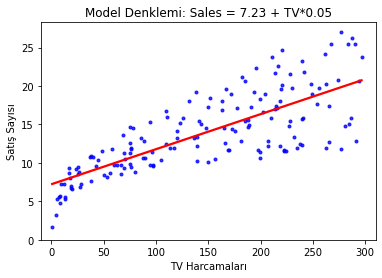

In [24]:

g = sns.regplot(x=X_train, y=y_train, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [25]:
### regplot ------> regresyon plot

### MSE

In [28]:
y_pred = reg_model.predict(X_test)

In [29]:
mean_squared_error(y_test, y_pred)          # (actual,pred)

9.226106221771955

### istediğimiz şey bu hata ne kadar az olursa bizim için o kadar iyi. aslında bu hataların karesi olduğundan o kadar da kötü değil modelimiz ama yine de bir şeylerle karşılaştırma ihtiyacı duyuyoruz : 

In [32]:
y_test.mean()

sales   14.59
dtype: float64

In [33]:
y_test.std()

sales   5.49
dtype: float64

### ortalaması 14,59      std --> 5,5  : buradan şöyle bir çıkarım yapabiliz benim modelim 9,22'lik bir hata yapıyor ve y_test ortalaması 14,59 bu bana sıkıntı oluşturabilir yani yüksek bir hata ama mse olduğuna da dikkat edelim.

## RMSE

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.0374506122358524

## MAE

In [36]:
mean_absolute_error(y_test, y_pred)

2.3984194611663803

## R-KARE

### modelimize göre ; tv değişkeninin sales'ı açıklayabilme oranıdır.(simple reg var çünkü burada.)

In [42]:
reg_model.score(X_test, y_test)            # (test datasını içine yazıyoruz.)

0.6857132282294656

In [43]:
from sklearn import metrics

In [45]:
metrics.r2_score(y_test,y_pred)          # **** (actual,pred)        --------> r2 ile model.score içindeki parametreler farklı.

0.6857132282294656